In [2]:
import numpy as np
import scipy as sp
import scipy.stats.qmc as qmc
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
sp.__version__

'1.7.1'

In [4]:
rng =  np.random.default_rng()

# Exploring smaller bootstrap samples

In [5]:
def f(x):
    x1 = x[:,0]
    x2 = x[:,1]
    return x1**2 + x2**2


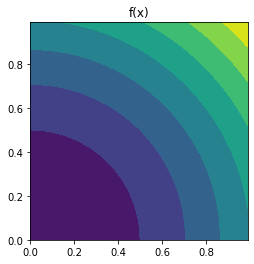

In [6]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
xx,yy = np.meshgrid(x,y)
xy = np.stack([xx.flatten(),yy.flatten()], axis=-1)
z = f(xy)
z = z.reshape(x.shape[0],y.shape[0])
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.title("f(x)")
plt.show()

In [7]:
# Analytic first and second moments

In [8]:
# Uniform sampling

d   = 2 # number of dimensions

m   = 9
N   = 2**9 # number of samples

samples_uniform  = rng.uniform(size=(N,d))

sampler = qmc.Sobol(d=d,scramble=True)
samples_sobol = sampler.random_base2(m=m)

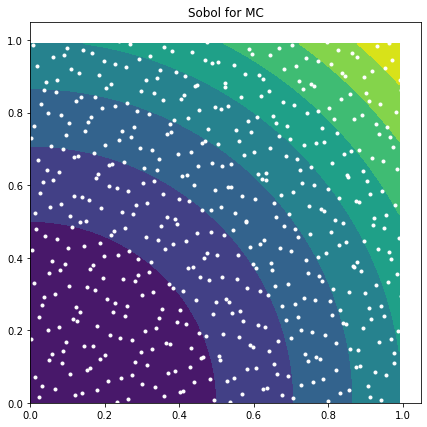

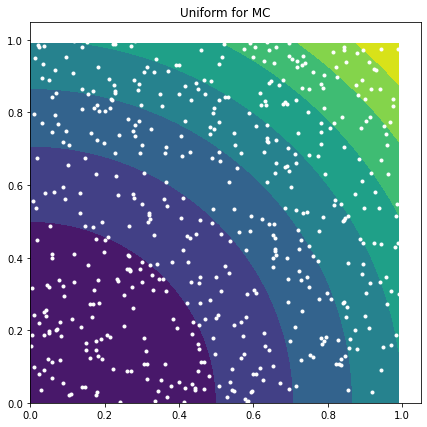

In [9]:
samples_sobol.shape, samples_uniform.shape

plt.figure(figsize=(7,7))
plt.title('Sobol for MC')
h = plt.contourf(x, y, z)
plt.plot( samples_sobol[:,0], samples_sobol[:,1], '.', label='Sobol', c="white")
plt.show()

plt.figure(figsize=(7,7))
plt.title('Uniform for MC')
h = plt.contourf(x, y, z)
plt.plot( samples_uniform[:,0], samples_uniform[:,1], '.', label='Uniform', c="white")
plt.show()

In [10]:
np.mean(f(samples_sobol)), np.mean(f(samples_uniform))

(0.666668095484348, 0.6680811823237625)

In [11]:
np.var(f(samples_sobol)), np.var(f(samples_uniform))

(0.17780638011741612, 0.19407823936954094)

In [12]:
# Uniform sampling

d   = 2 # number of dimensions
m   = 9
N   = 2**6 # number of samples

def get_uniform_samples():
    return rng.uniform(size=(N,d))

def get_sobol_samples():
    sampler = qmc.Sobol(d=d,scramble=True)
    return sampler.random_base2(m=m)

sobol_means = [np.mean(f(get_sobol_samples())) for i in range(100)]
uniform_means = [np.mean(f(get_uniform_samples())) for i in range(100)]



In [13]:
sobol_means = [get_sobol_samples() for i in range(100)]


In [17]:
sobol_means[0][:,0]

array([0.52989087, 0.46482438, 0.11095457, 0.92675519, 0.84542257,
       0.16097702, 0.26435784, 0.69904536, 0.68352515, 0.37359369,
       0.2079301 , 0.76713175, 0.9421531 , 0.00159686, 0.41774896,
       0.60805988, 0.58214283, 0.39207605, 0.05771106, 0.99851143,
       0.79217905, 0.23273328, 0.31660974, 0.62629706, 0.73575038,
       0.30081871, 0.15471327, 0.83891469, 0.88893628, 0.07337979,
       0.46997422, 0.53528488, 0.55564255, 0.49766159, 0.08593741,
       0.89318329, 0.82015848, 0.12765032, 0.28986445, 0.73212969,
       0.65386939, 0.33684808, 0.23685566, 0.80460775, 0.97132176,
       0.03883148, 0.38833442, 0.57107097, 0.61180431, 0.42882362,
       0.02878357, 0.96102971, 0.76300466, 0.19549672, 0.34602624,
       0.66329169, 0.70999682, 0.26797572, 0.17973618, 0.8724885 ,
       0.91420227, 0.10671224, 0.44446182, 0.50219864, 0.5142982 ,
       0.44899538, 0.09534281, 0.91089189, 0.86087769, 0.17666891,
       0.27983201, 0.71477157, 0.66779178, 0.35809615, 0.19221

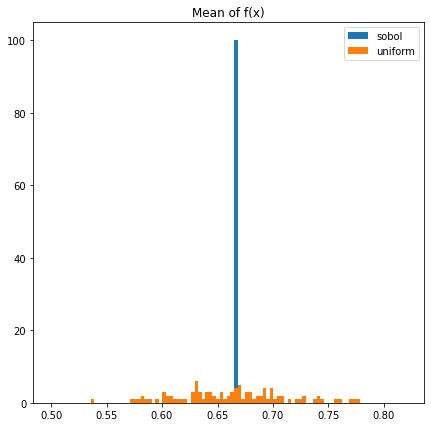

In [133]:
plt.figure(figsize=(7,7))
bins = np.linspace(0.66-0.16,0.66+0.16, 100)
plt.hist(sobol_means, bins, label="sobol")
plt.hist(uniform_means, bins, label="uniform")
plt.title("Mean of f(x)")
plt.legend()


In [134]:
sobol_vars = [np.var(f(get_sobol_samples())) for i in range(100)]
uniform_vars = [np.var(f(get_uniform_samples())) for i in range(100)]

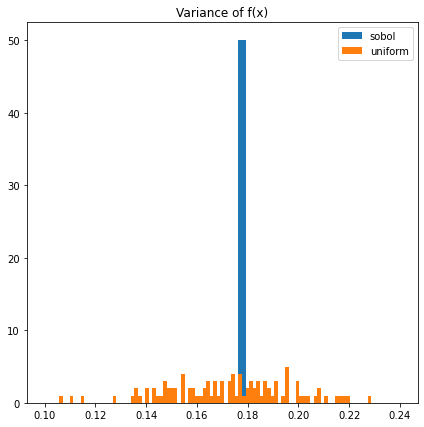

In [135]:
plt.figure(figsize=(7,7))
bins = np.linspace(0.17-0.07,0.17+0.07, 100)
plt.hist(sobol_vars, bins, label="sobol")
plt.hist(uniform_vars, bins, label="uniform")
plt.title("Variance of f(x)")
plt.legend()
